In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

In [ ]:
data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB
None


In [ ]:
print(data.describe())

                      date  active_vehicles         trips
count                  354       354.000000    354.000000
mean   2015-01-30 00:00:00      1307.435028  11667.316384
min    2015-01-01 00:00:00       112.000000    629.000000
25%    2015-01-15 00:00:00       296.750000   2408.500000
50%    2015-01-30 00:00:00      1077.000000   9601.000000
75%    2015-02-14 00:00:00      1417.000000  13711.250000
max    2015-02-28 00:00:00      4395.000000  45858.000000
std                    NaN      1162.510626  10648.284865


In [ ]:
data.isnull().sum()

,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0


In [ ]:
data.duplicated().sum()

np.int64(0)

Basic Metrics

In [ ]:
total_trips = data['trips'].sum()
total_vehicles = data['active_vehicles'].sum()
avg_trips_per_day = data.groupby('date')['trips'].sum().mean()
avg_trips_per_vehicle = total_trips/total_vehicles

In [ ]:
print('Total Trips:',total_trips)
print('Total Vehicles:',total_vehicles)
print('Average Trips Per Day:',round(avg_trips_per_day,2))
print('Average Trips Per Vehicle:',round(avg_trips_per_vehicle,2))

Total Trips: 4130230
Total Vehicles: 462832
Average Trips Per Day: 70003.9
Average Trips Per Vehicle: 8.92


Daily Trend Of Trips

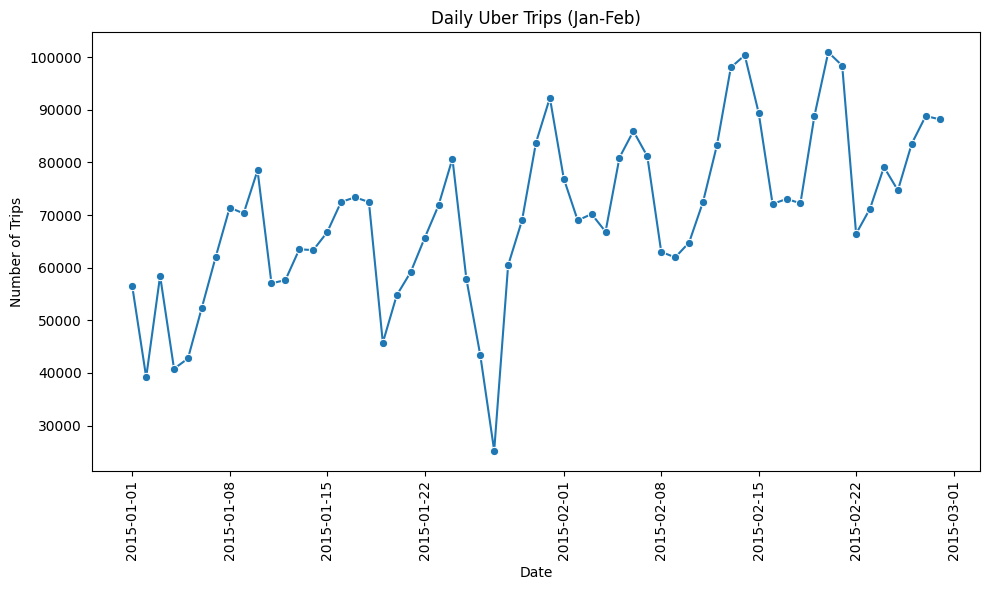

In [ ]:
daily_trips = data.groupby('date')['trips'].sum().reset_index()

plt.figure(figsize=[10,6])
sns.lineplot(x='date',y='trips',data= daily_trips, marker='o')
plt.title('Daily Uber Trips (Jan-Feb)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Trips Per Vehicle Distribution

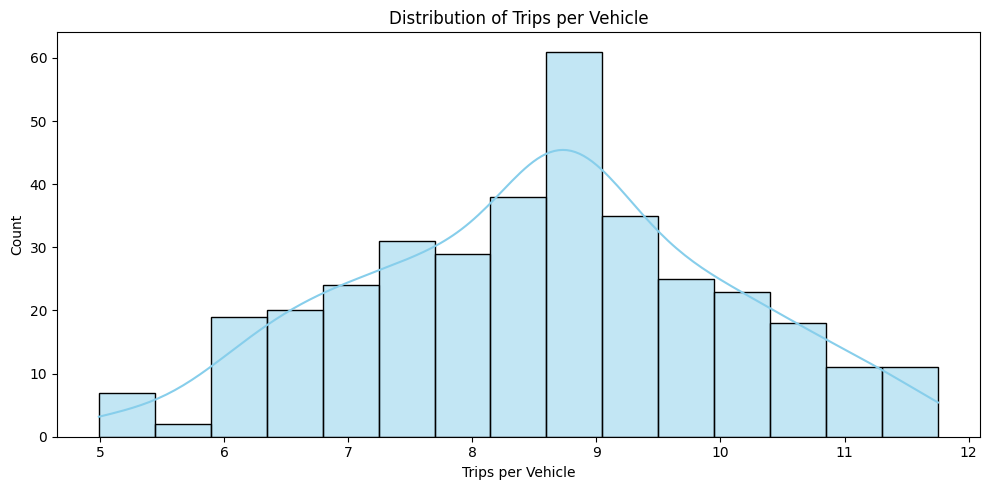

In [ ]:
data['trips_per_vehicle'] = data['trips']/data['active_vehicles']

plt.figure(figsize=[10,5])
sns.histplot(data['trips_per_vehicle'],bins=15,kde=True,color='skyblue')
plt.title('Distribution of Trips per Vehicle')
plt.xlabel('Trips per Vehicle')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Base Performace (Total Trips)

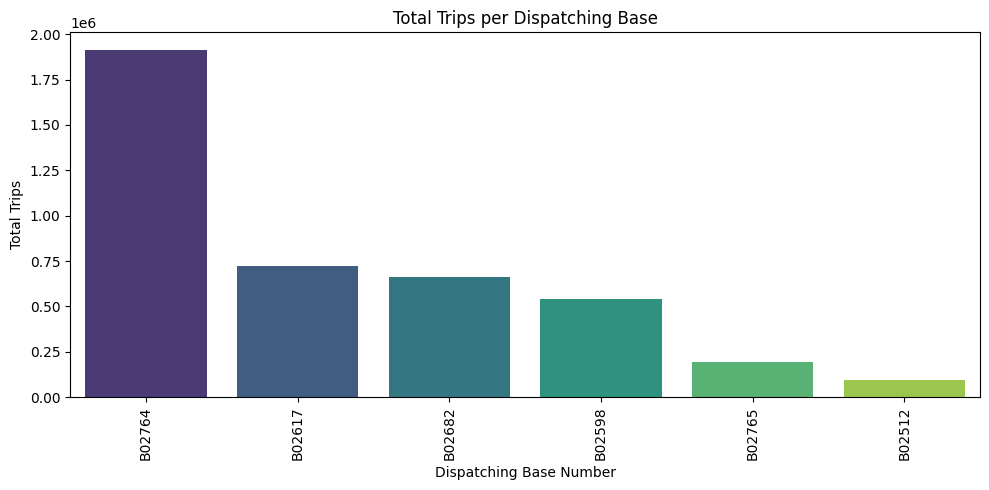

In [ ]:
base_trips  = data.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False)

plt.figure(figsize=[10,5])
sns.barplot(x=base_trips.index, y=base_trips.values, palette='viridis')
plt.title('Total Trips per Dispatching Base')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Total Trips')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Base Efficiency

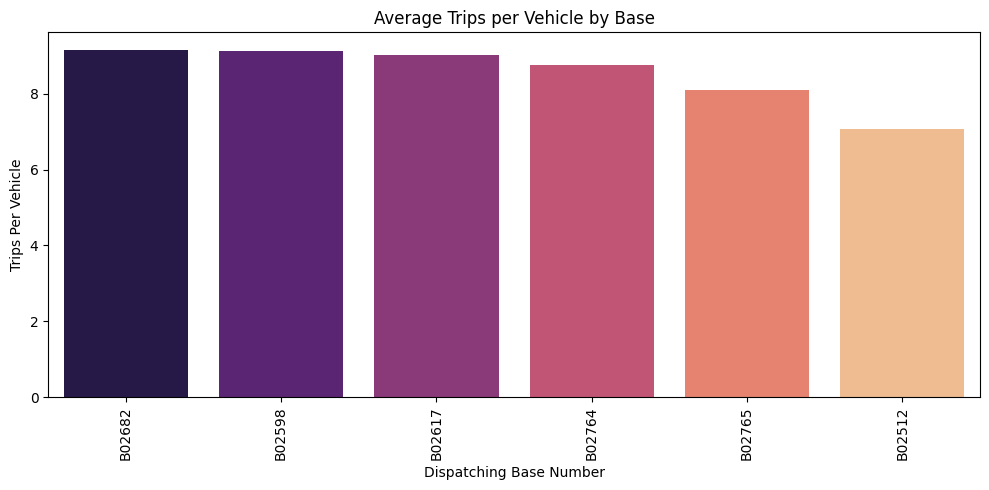

In [ ]:
base_efficiency = data.groupby('dispatching_base_number')['trips_per_vehicle'].mean().sort_values(ascending=False)

plt.figure(figsize=[10,5])
sns.barplot(x=base_efficiency.index,y=base_efficiency.values ,palette='magma')
plt.title('Average Trips per Vehicle by Base')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Trips Per Vehicle')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Active Vehicles v/s Trips

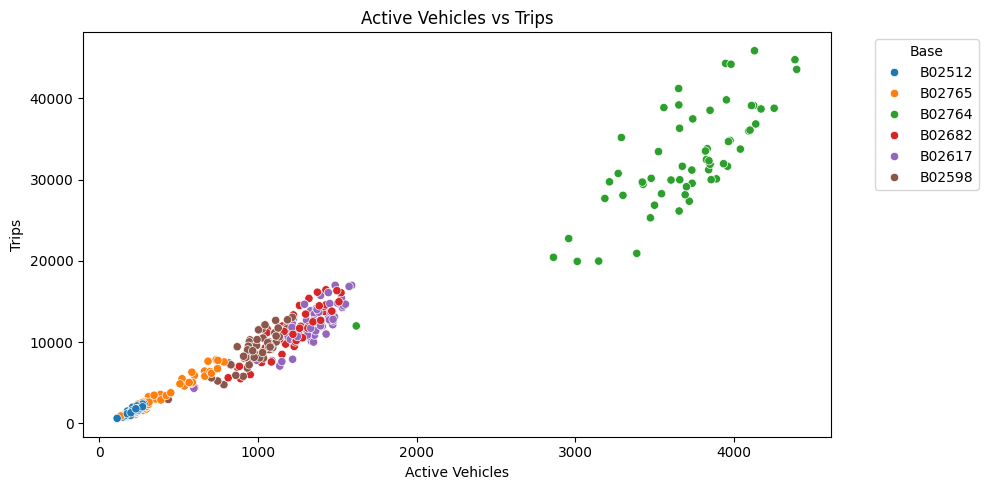

Correlation between active vehicles and trips: 0.98


In [ ]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=data,x='active_vehicles',y='trips',hue='dispatching_base_number',palette='tab10')
plt.title('Active Vehicles vs Trips')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.legend(title='Base',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

#correlation coefficient
corr = data['active_vehicles'].corr(data['trips'])
print('Correlation between active vehicles and trips:',round(corr, 2))

Weekly Trend

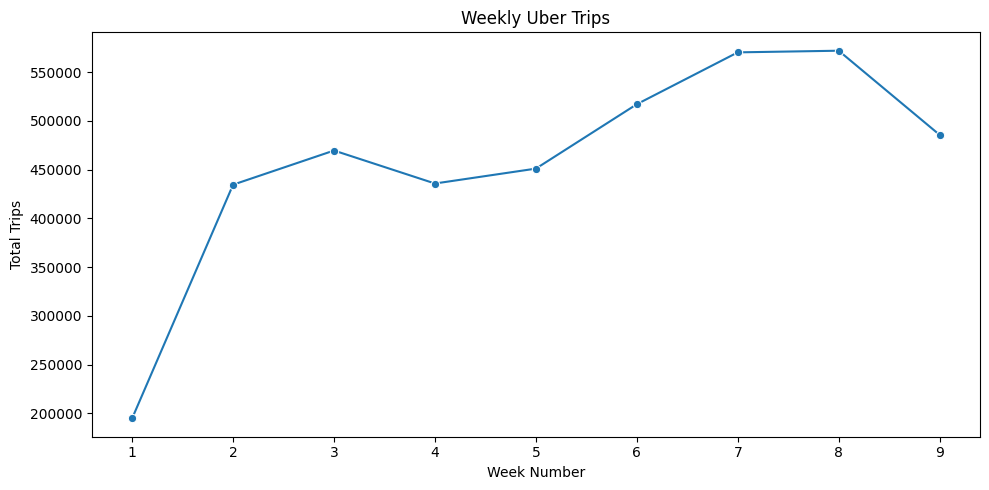

In [ ]:
data['week'] = data['date'].dt.isocalendar().week
weekly_trips = data.groupby('week')['trips'].sum().reset_index()

plt.figure(figsize=[10,5])
sns.lineplot(data=weekly_trips,x='week',y='trips',marker='o')
plt.title('Weekly Uber Trips')
plt.xlabel('Week Number')
plt.ylabel('Total Trips')
plt.tight_layout()
plt.show()